# **PREDICCIÓN DEL PRECIO DE LAS CASAS EN AMSTERDAM**

***Contenido (extraido de Kaggle):***

Los precios de las viviendas se obtuvieron de Pararius.nl como una instantánea de agosto de 2021. Los datos originales incluían características como el precio, la superficie y el número de habitaciones. Los datos se han mejorado aún más utilizando la API de Mapbox para obtener las coordenadas de cada anuncio.

### **ENMARCAR EL PROBLEMA**
- Objetivo: Predicción del precio de las casas en Amsterdam
- Datos supervisados
- Tipo problema: Regresión (predicción de un valor (precio))
- Formato: *csv*

### **OBTENCIÓN Y CARGA DE DATOS**

In [ ]:
#importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importar datos en un df
df_house = pd.read_csv('data/data_raw.csv')


### **EXPLORACIÓN DE DATOS - EDA**




**Descripción general del conjunto de datos.**

Este conjunto de datos contiene información relacionada con la vivienda (número de habitaciones, área, zona, etc.) de modo que se realice una predicción de qué precio tendría una vivienda en base a esta información.

**Descripción de las columnas**

- *Unnamed*: es un índice que no aporta valor.
- *Address*: nombre de la calle en Amsterdam donde se encuentra la vivienda.
- *Zip*: código postal de la vivienda en Amsterdam.
- *Price*: Precio de venta de la vivienda (variable objetivo).
- *Area*: superficie habitable de la vivienda (en m2).
- *Room*: número de habitaciones que dispone la vivienda.
- *Lon*: longitud geográfica (coordenada en Amsterdam). Allí suele estar entre 4.7 y 5, cuanto mayor sea, más al este se encuentra.
- *Lat*: latitud geográfica (coordenada en Amsterdam). Allí suele estar entre 52.3 y 52.4, cuanto mayor sea, más al norte se encuentra.

In [ ]:
#Visualizar datos del dataframe
df_house.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [ ]:
#Dimensiones del dataframe
df_house.shape

(924, 8)

In [ ]:
#Resumen columnas
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [ ]:
#resumen estadístico
df_house.describe(include='all')

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
count,924.000000,924,924,9.200000e+02,924.000000,924.000000,924.000000,924.000000
unique,NaN,919,834,NaN,NaN,NaN,NaN,NaN
top,NaN,"Nieuwevaartweg, Amsterdam",1075 XR,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,5,NaN,NaN,NaN,NaN,NaN
mean,462.500000,NaN,NaN,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,NaN,NaN,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,NaN,NaN,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,NaN,NaN,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,NaN,NaN,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,NaN,NaN,7.000000e+05,113.000000,4.000000,4.922337,52.377598


In [ ]:
#Detección de valores nulos
df_house.isnull().sum()

,0
Unnamed: 0,0
Address,0
Zip,0
Price,4
Area,0
Room,0
Lon,0
Lat,0


In [ ]:
#Detección de valores duplicados
df_house.duplicated().sum()

np.int64(0)

In [ ]:
#Filtrar las columnas categóricas de tipo 'object'
columnas_object = df_house.select_dtypes(include=['object']).columns

#Obtener para cada columnas object value_counts()
for col in columnas_object:
  print(f"Value counts para columna '{col}':")
  print(df_house[col].value_counts())
  print('\n')

Value counts para columna 'Address':
Address
Nieuwevaartweg, Amsterdam                    2
Ringdijk, Amsterdam                          2
Uilengouw 2, Amsterdam                       2
Quashibastraat, Amsterdam                    2
Huidekoperstraat 24 F, Amsterdam             2
                                            ..
Willem Mollhof 3, Amsterdam                  1
De Bleeckster 1, Amsterdam                   1
Prinsengracht 460 A, Amsterdam               1
Eerste Looiersdwarsstraat 24 E, Amsterdam    1
Witte de Withstraat 20 AH, Amsterdam         1
Name: count, Length: 919, dtype: int64


Value counts para columna 'Zip':
Zip
1075 XR    5
1017 KP    4
1077 KG    3
1011 AW    3
1068 WT    3
          ..
1054 DT    1
1066 DE    1
1023 NM    1
1095 AE    1
1035 RW    1
Name: count, Length: 834, dtype: int64




Tanto 'address' y 'ZIP' son variables categóricas que no aportan valor a este proceso y por tanto, no realizaremos ninguna operación sobre ellas.

In [ ]:
#Análisis de Skewness
skews = df_house.select_dtypes(exclude=['object']).skew().sort_values(ascending=False)
print('Skewness por variable:\n',skews)

Skewness por variable:
 Price         4.828817
Area          3.144805
Room          2.034096
Unnamed: 0    0.000000
Lon          -0.080557
Lat          -0.485953
dtype: float64


In [ ]:
#Análisis de Kurtosis
kurtosis = df_house.select_dtypes(exclude=['object']).kurtosis().sort_values(ascending=False)
print('Exceso de kurtosis por variable:\n',kurtosis)

Exceso de kurtosis por variable:
 Price         33.905643
Area          17.040446
Room           7.813254
Lat            0.910045
Lon            0.321625
Unnamed: 0    -1.200000
dtype: float64


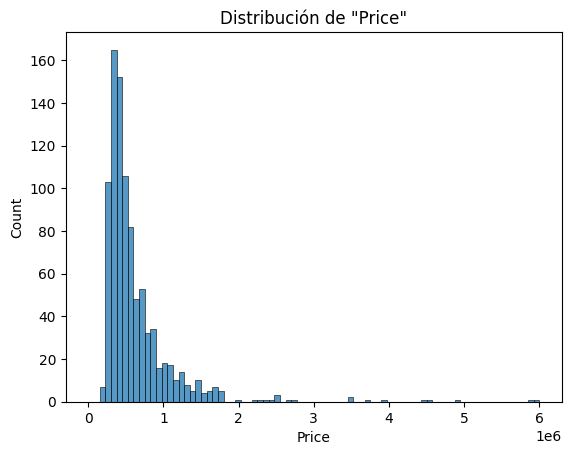

In [ ]:
#Histograma para Price -> observación skewness/kurtosis
sns.histplot(df_house['Price'], bins=80, binrange=(0,6000000), kde=False)
plt.title('Distribución de "Price"')
plt.show()

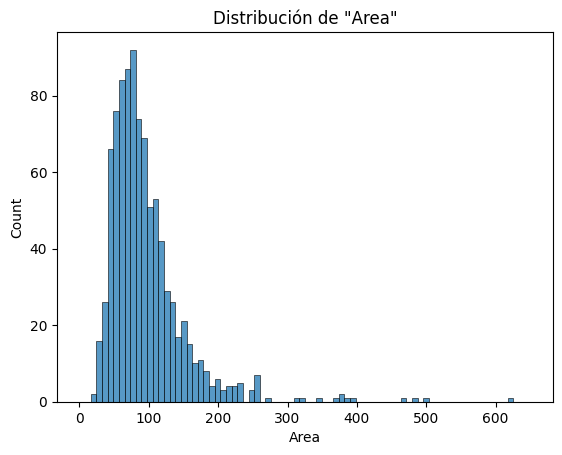

In [ ]:
#Histograma para Area -> observación skewness/kurtosis
sns.histplot(df_house['Area'], bins=80, binrange=(0,650), kde=False)
plt.title('Distribución de "Area"')
plt.show()

Análisis de skewness y kurtosis:
- Skewness: la mayoría de atributos presentan un valor alrededor de 0 por lo que tienden a una distribución simétrica. Las únicas variables con un valor más elevado son Price y Area.
- Kurtosis: todas las variables presentan valores de kurtosis próximos a 0 exceptuando 'Price' y 'Area' que tiene un valor positivo significando la presencia de más outliers o valores fuera de serie.

Al representar ambas variables y observar su distribución, efectivamente tienen una asimetria derecha. En este caso, no podemos considerar que sean outliers ya que tanto 'Price' como 'Area' son atributos que pueden tener un amplio rango de valores ya que existen viviendas de todo tipo en cuanto a precio y dimensiones.

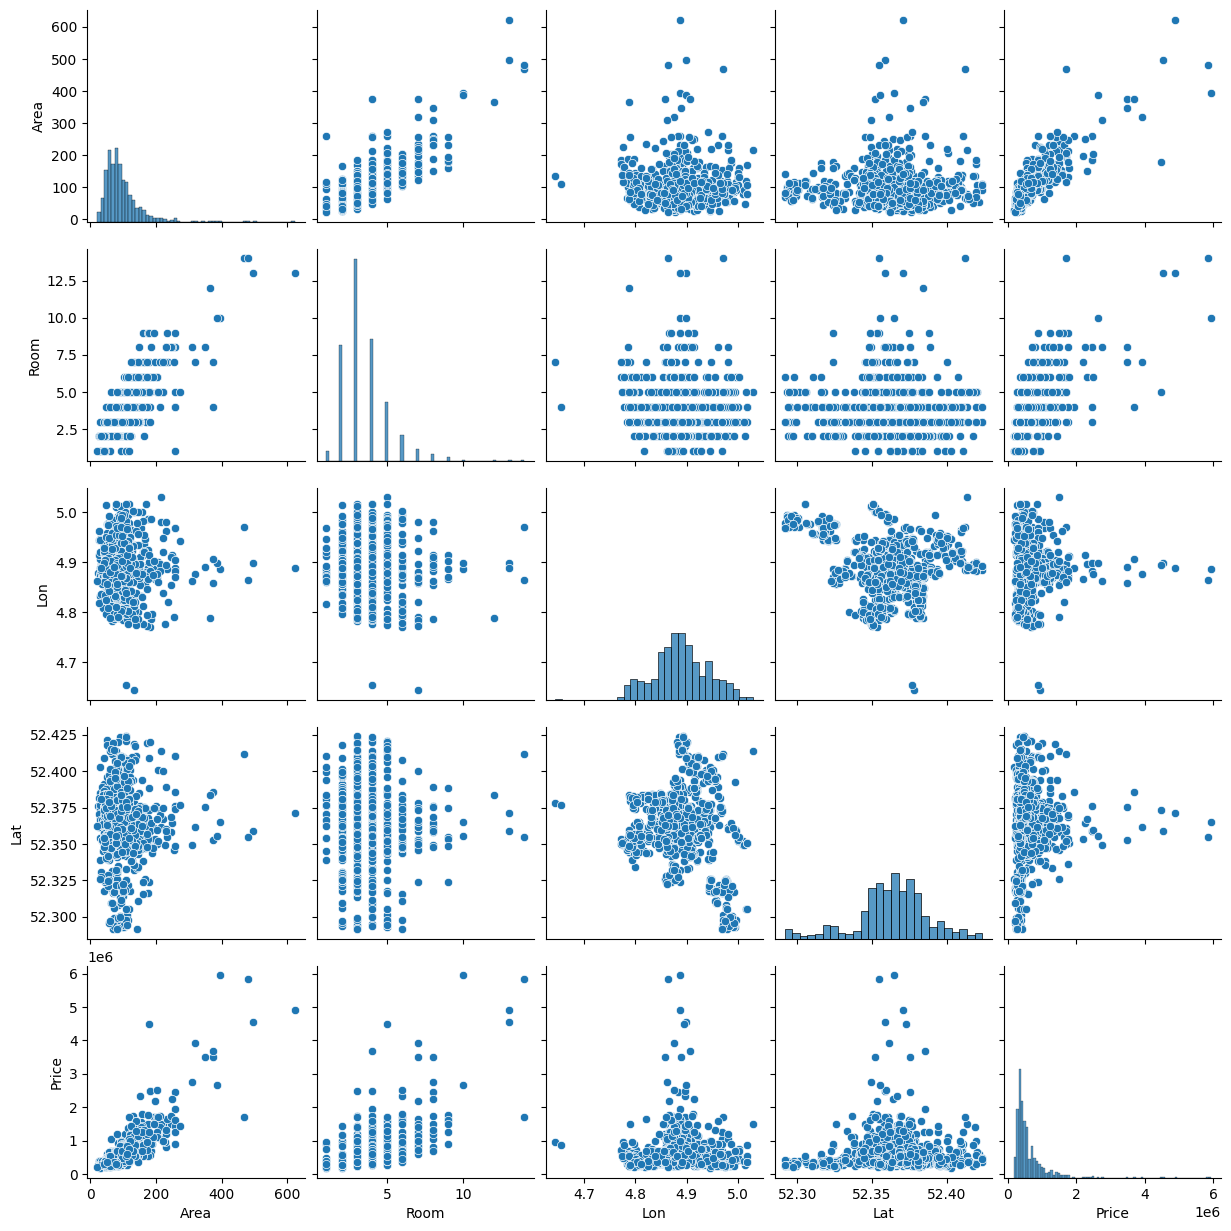

In [ ]:
#Distribución de las variables numéricas, relaciones entre ellas
sns.pairplot(df_house[['Area', 'Room', 'Lon', 'Lat', 'Price']])
plt.show()

In [ ]:
#Matriz de correlación
matriz_correlacion = df_house[['Area', 'Room', 'Lon', 'Lat', 'Price']].corr()
print(matriz_correlacion)

           Area      Room       Lon       Lat     Price
Area   1.000000  0.812421  0.012196  0.017993  0.835090
Room   0.812421  1.000000 -0.036585 -0.016381  0.623448
Lon    0.012196 -0.036585  1.000000 -0.184436 -0.013561
Lat    0.017993 -0.016381 -0.184436  1.000000  0.062196
Price  0.835090  0.623448 -0.013561  0.062196  1.000000


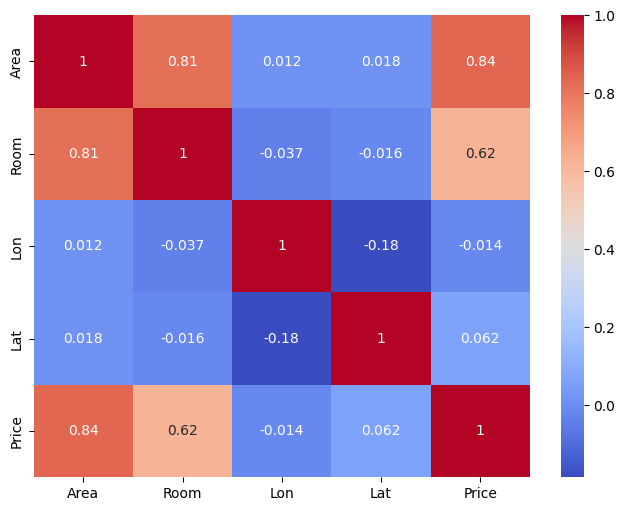

In [ ]:
#Mapa de calor para visualizar correlación
plt.figure(figsize=(8,6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.show()

Tras representar cómo de distribuye cada variable y cómo es la relación con la variable objetivo 'Price', concluimos:
- Las variables 'Room' y 'Area' presentan un valor de correlación alto (0.84). Esto tiene sentido ya que cuanta más área tiene una vivienda suele tender a haber más habitaciones.
- La variable que más tiende a una relación lineal con la variable objetivo 'Price' es 'Area' seguida de 'Room'.


### **PREPARACIÓN DE DATOS**




###Limpieza y preprocesamiento de datos

#####Missing values

In [ ]:
#Valores nulos en 'Price', los eliminamos
df_house.dropna(inplace=True)


#####Columnas sin valor

In [ ]:
#Columnas sin valor-> Unnamed no aporta valor
df_house.drop(['Unnamed: 0'], axis=1, inplace=True)

#Guardamos el csv con los datos limpios
df_house.to_csv('data/data_cleaned.csv', index=False)


###Feature engineering

In [ ]:
#PREPROCESSING & FEATURE ENGINEERING
  #Feature scaling - Normalización --> comentado porque tras entrenar modelos empeora los resultados
#from sklearn.preprocessing import MinMaxScaler

#min_max_scaler = MinMaxScaler()
#scaled_data = min_max_scaler.fit_transform(df_house.drop(['address', 'zip'], axis=1))
#df_house_scaled = pd.DataFrame(scaled_data, columns=df_house.drop(['address', 'zip'], axis=1).columns)

#Guardamos el csv en caso de que fuese interesante a futuro usarlo
#df_house_scaled.to_csv('data_preprocessed.csv', index=False)
#df_house_scaled.head()


,Price,Area,Room,Lon,Lat
0,0.088312,0.071429,0.153846,0.684140,0.488623
1,0.051948,0.064784,0.153846,0.535143,0.431391
2,0.116883,0.146179,0.230769,0.780517,0.395076
3,0.070130,0.177741,0.384615,0.377590,0.394547
4,0.094372,0.194352,0.307692,0.670523,0.899710


In [ ]:
#Features (X) vs Target (Y)
X = df_house.drop(['Price', 'Address', 'Zip'], axis=1)
y = df_house['Price']
#X = df_house_scaled.drop(['Price'], axis=1)
#y = df_house_scaled['Price']

X.head()

,Area,Room,Lon,Lat
0,64,3,4.907736,52.356157
1,60,3,4.850476,52.348586
2,109,4,4.944774,52.343782
3,128,6,4.789928,52.343712
4,138,5,4.902503,52.410538


In [ ]:
#Train - test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

#Dividir los datos en conjuntos de entrenamiento y prueba, train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

### **ENTRENAMIENTO MODELOS ML**



In [ ]:
#Importación de métricas
from sklearn.model_selection import cross_val_score, GridSearchCV

#Importación de modelos de clasificación
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

#Creamos listas para almacenar los resultados obtenidos de los distintos modelos
  #modelos
models = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'Decision Tree','Random Forest', 'Gradient Boosting', 'SVR']

  #métricas
MAE_scores = []
MSE_scores = []
RMSE_scores = []
R2_scores = []

#Definición de los modelos
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
knn_model = KNeighborsRegressor()
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
svr_model = SVR()

#Lista de modelos
model_list = [linear_model, ridge_model, lasso_model, knn_model, tree_model, rf_model, gb_model, svr_model]


#####Entrenamiento de cada modelo

In [ ]:
#Entrenamiento y evaluacion de cada modelo
predictions = {}

for name, model in zip(models, model_list):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  predictions[name] = y_pred

  MAE_scores.append(mean_absolute_error(y_test, y_pred))
  MSE_scores.append(mean_squared_error(y_test, y_pred))
  RMSE_scores.append(root_mean_squared_error(y_test, y_pred))
  R2_scores.append(r2_score(y_test, y_pred))


#Creación de dataframe para los resultados
results_df_orig = pd.DataFrame({
    'Model': models,
    'MAE': MAE_scores,
    'MSE': MSE_scores,
    'RMSE': RMSE_scores,
    'R2': R2_scores,
})

#Mostrar resultados
print(results_df_orig)

               Model            MAE           MSE           RMSE        R2
0  Linear Regression  164755.885594  6.095823e+10  246897.195663  0.799811
1              Ridge  166323.142004  6.163593e+10  248265.841759  0.797585
2              Lasso  164760.955557  6.095984e+10  246900.456417  0.799805
3                KNN  156566.358696  7.429355e+10  272568.424905  0.756017
4      Decision Tree  156264.396739  1.712452e+11  413817.843951  0.437624
5      Random Forest  101266.745163  5.447068e+10  233389.538477  0.821116
6  Gradient Boosting  110242.212788  5.769627e+10  240200.481897  0.810523
7                SVR  290684.981505  3.290230e+11  573605.301886 -0.080525


Obtenemos como 3 mejores modelos: Random Forest, Gradient Boosting y Linear Regression

#####Entrenamiento con validación cruzada

In [ ]:
 #Entrenamiento y evaluacion de cada modelo con validación cruzada -> cross_validation
  #métricas
MAE_scores = []
MSE_scores = []
RMSE_scores = []
R2_scores = []

for model in model_list:
    MAE_scores.append(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=5).mean())
    MSE_scores.append(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv=5).mean())
    RMSE_scores.append(-cross_val_score(model, X_train, y_train, scoring = 'neg_root_mean_squared_error', cv=5).mean())
    R2_scores.append(cross_val_score(model, X_train, y_train, scoring = 'r2', cv=5).mean())

#Creación de dataframe para los resultados
results_df_orig_cv = pd.DataFrame({
    'Model': models,
    'MAE': MAE_scores,
    'MSE': MSE_scores,
    'RMSE': RMSE_scores,
    'R2': R2_scores,
})

#Mostrar resultados
print(results_df_orig_cv)


               Model            MAE           MSE           RMSE        R2
0  Linear Regression  184535.357792  9.352117e+10  298135.331406  0.625094
1              Ridge  185886.073746  9.357192e+10  298404.322944  0.624490
2              Lasso  184538.408894  9.352121e+10  298135.891124  0.625094
3                KNN  166107.984848  1.057398e+11  308139.002421  0.623955
4      Decision Tree  157612.315922  1.489415e+11  369927.322023  0.353477
5      Random Forest  114398.634572  7.435760e+10  257181.101466  0.725791
6  Gradient Boosting  116087.938035  6.851210e+10  253471.616816  0.729920
7                SVR  273063.052901  3.094318e+11  535280.977825 -0.090693


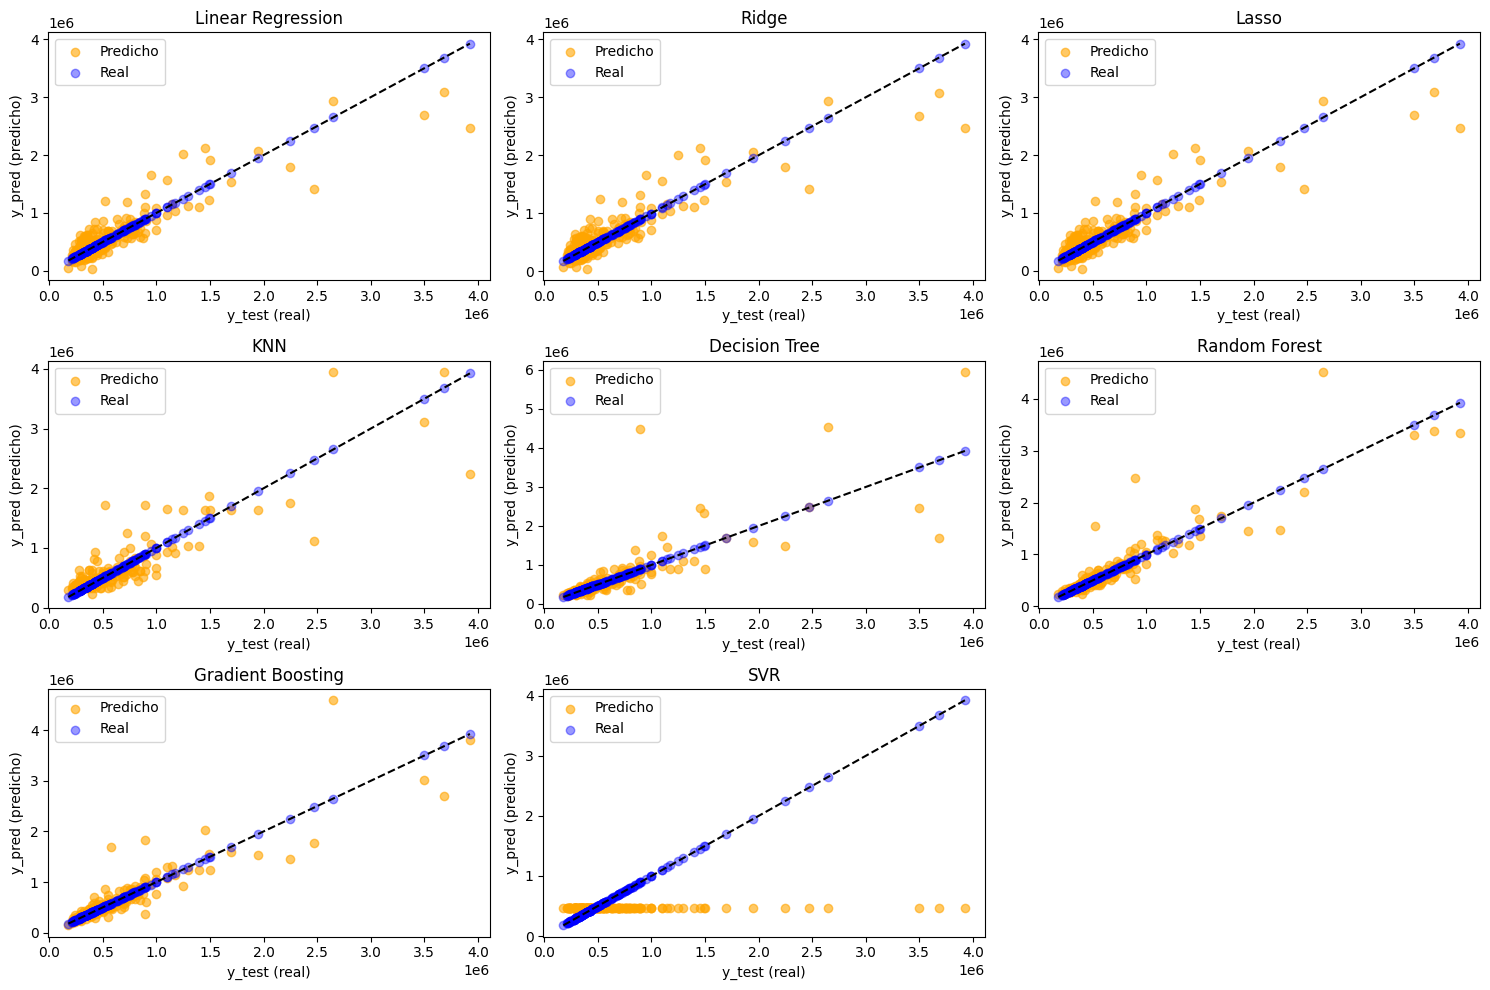

In [ ]:
# Suponiendo que y_test son tus datos reales y y_pred tus predicciones
plt.figure(figsize=(15, 10))

for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(3, 3, i)
    plt.scatter(y_test, y_pred, color='orange', alpha=0.6, label='Predicho')
    plt.scatter(y_test, y_test, color='blue', alpha=0.4, label='Real')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel("y_test (real)")
    plt.ylabel("y_pred (predicho)")
    plt.title(f"{name}")
    plt.legend()



plt.tight_layout()
plt.show()

### **AJUSTE HIPERPARÁMETROS Y OPTIMIZACIÓN DEL MODELO**



***Random Forest***

In [ ]:
#Ajuste hiperparámetros para Random Forest
param_grid_rf = {'n_estimators':[200, 250], 'max_depth': [35, 40], 'min_samples_split': [12, 15]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

In [ ]:
best_rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 40,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
import joblib
#Tras obtener los parámetros, probamos a volver a entrenar el modelo siguiento esto
rf_best = RandomForestRegressor(max_depth=35, n_estimators=200, min_samples_split=15)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

MAE=mean_absolute_error(y_test, y_pred)
MSE=mean_squared_error(y_test, y_pred)
RMSE=root_mean_squared_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)
print('mse',MSE)
print('mae',MAE)
print('r2',R2)

#Guardamos el modelo Random Forest
joblib.dump(rf_best, 'model/best_model_rf.pkl')


mse 37829375958.84858
mae 96675.39741164907
r2 0.875766762891636


['best_model_rf.pkl']

***Gradient Boosting***

In [ ]:
#Ajuste hiperparámetros para Gradient Boosting
param_grid_gb = {'n_estimators':[500, 800, 1000], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth':[2,3,4]}
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_

In [ ]:
best_gb_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Tras obtener los parámetros, probamos a volver a entrenar el modelo siguiento esto
gb_best = GradientBoostingRegressor(learning_rate=0.01, n_estimators=800, max_depth=3)
gb_best.fit(X_train, y_train)
y_pred = gb_best.predict(X_test)

MAE=mean_absolute_error(y_test, y_pred)
MSE=mean_squared_error(y_test, y_pred)
RMSE=root_mean_squared_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)
print('mse',MSE)
print('mae',MAE)
print('r2',R2)

mse 61986846983.75482
mae 114752.19299011228
r2 0.7964326277200613


***Linear Regression***